#Name: Placido Pereira
#Course: Msc. Data Science AI and Digital Buisness
#module: M507A Methods of Prediction
#GH No.: GH1043344

# Introduction

In this project I developed an end to end machine learning pipeline to predict customer churn in telecom industry using deep learning model built with Keras and tensorflow. The workflow includes data preprocessing, Featured engineering, neural network modeling, hyperparameter tuning, and performance comparisons to identify the most effective churn prediction model.

# Problem Statement

Customer churn negatively impacts telecom companies by increasing revenue loss and customer acquisition costs. The objective of this project is to build a binary classification model that predicts the wether the customer will churn or not based on customer demographics, servcie usage, and account related features, enabling proactive retention strategies.

# Import Necessary Libraries

Here, I imported the required python libraries such as Numpy, Pandas, Matplotlib, Scikit Learn, and TensorFlow/Keras to perform data processing, visualization, model building, and evaluation.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Data Source Link

https://www.kaggle.com/datasets/ditisolanki/wa-fn-usec-telco-customer-churn

# Load the Dataset

Here, I loaded the telecom customer churn dataset into the notebook using pandas so it can be explored and processed for model training.

In [30]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Preprocess the Data

In this step, I prepared raw dataset by cleaning it and converting it into a suitable format for further analysis and model building.

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Visualizing the Data Distribution

Here, I visualized the distribution of key features and the target vaariable to understand patterns, class imbalance and overall data behaviour  

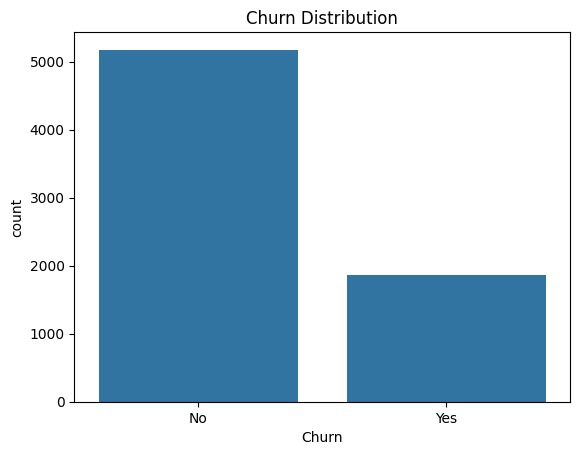

In [33]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

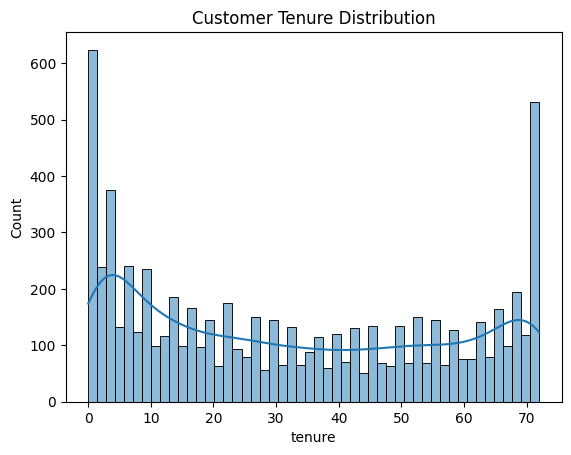

In [34]:
sns.histplot(data['tenure'], bins=50, kde=True)
plt.title('Customer Tenure Distribution')
plt.show()

# Data Preprocessing

In this part, I applied processing techniques such as encoding categorical variables and scaling numerical features to make data model ready.

In [35]:
data = data.drop(columns=['customerID'])
data = pd.get_dummies(data, drop_first=True)
print(data.head())


   SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0              0       1           29.85        False         True   
1              0      34           56.95         True        False   
2              0       2           53.85         True        False   
3              0      45           42.30         True        False   
4              0       2           70.70        False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True                           False   
2           False              True                           False   
3           False             False                            True   
4           False              True                           False   

   MultipleLines_Yes  InternetService_Fiber optic  ...  TotalCharges_996.45  \
0              False                        False  ...                Fal

# Feature Engineering

In here, I created new meaningful features from existing ones to improve model's ability to predict customer churn.

In [36]:
print(data.columns)

data['loyalty'] = data['tenure'] * (data['Contract_One year'] * 1)
print(data[['tenure', 'Contract_One year', 'loyalty']].head())

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=6560)
   tenure  Contract_One year  loyalty
0       1              False        0
1      34               True       34
2       2              False        0
3      45               True       45
4       2              False        0


# Splitting Data into Features (X) and Target (y)

In here, I seperated the dataset into input features features(X) and the target variable(y) so model could learn to predict churn.

In [37]:
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train shape: {X_train_scaled.shape}, X_test shape: {X_test_scaled.shape}")


X_train shape: (5634, 6560), X_test shape: (1409, 6560)


# Building the Neural Network Model Using Keras

In this section, I built deep neural network using Keras by defining the input layer, hidden layers, and, output layer for binary classification.

In [38]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       419,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,017 (1.61 MB)

 Trainable params: 422,017 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In here i trained the neural networks using training data over Multiple epochs while monitoring validation perforamnace.

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5670 - loss: 0.8015 - val_accuracy: 0.7473 - val_loss: 0.6070
Epoch 2/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9285 - loss: 0.2080 - val_accuracy: 0.7438 - val_loss: 0.5300
Epoch 3/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9814 - loss: 0.0579 - val_accuracy: 0.7424 - val_loss: 0.5882
Epoch 4/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9822 - loss: 0.0355 - val_accuracy: 0.7431 - val_loss: 0.6147
Epoch 5/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9860 - loss: 0.0263 - val_accuracy: 0.7459 - val_loss: 0.6782
Epoch 6/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9861 - loss: 0.0263 - val_accuracy: 0.7637 - val_loss: 0.6452
Epoch 7/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9840 - loss: 0.0269 - val_accuracy: 0.7473 - val_loss: 0.7220
Epoch 8/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9895 - loss: 0.0204 - val_accuracy

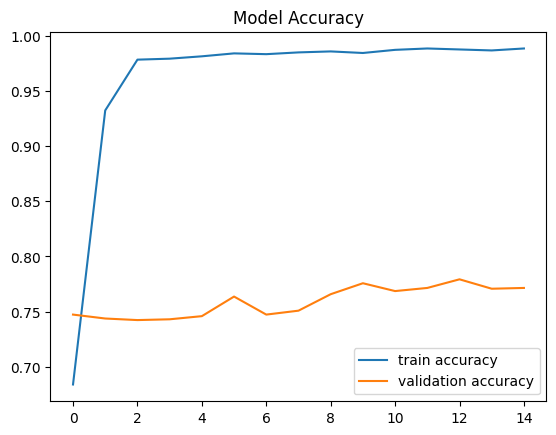

In [40]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

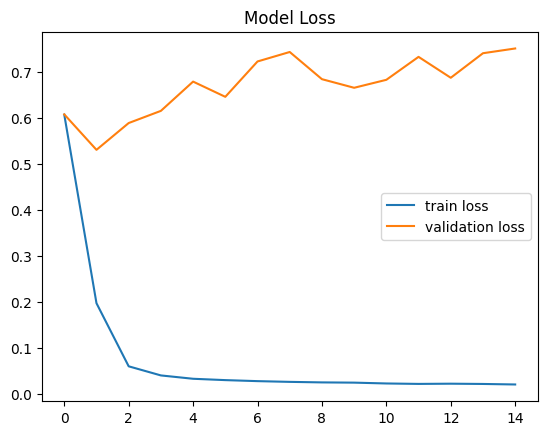

In [41]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Evaluating the Model

In this part, I evaluated the trained model on test dataset to measure its accuracy and its overall prediction performance.

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7626 - loss: 0.7669
Test Loss: 0.7502233386039734
Test Accuracy: 0.7714691162109375
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

       False       0.78      0.96      0.86      1036
        True       0.69      0.25      0.37       373

    accuracy                           0.77      1409
   macro avg       0.73      0.60      0.61      1409
weighted avg       0.76      0.77      0.73      1409

Test AUC: 0.604394609086298


# Hyperparameter Tuning

Here, I tuned basic models parameters such as learning rate and number of neurons to improve its model performance.

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9898 - loss: 0.0169 - val_accuracy: 0.7764 - val_loss: 0.7520
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9930 - loss: 0.0148 - val_accuracy: 0.7779 - val_loss: 0.7849
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9945 - loss: 0.0136 - val_accuracy: 0.7771 - val_loss: 0.8125
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9946 - loss: 0.0141 - val_accuracy: 0.7807 - val_loss: 0.7772
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9939 - loss: 0.0149 - val_accuracy: 0.7771 - val_loss: 0.7938
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9961 - loss: 0.0112 - val_accuracy: 0.7842 - val_loss: 0.7862
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9939 - loss: 0.0136 - val_accuracy: 0.7771 - val_loss: 0.8453
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9936 - loss: 0.0128 - val_accuracy: 0.7771 - v

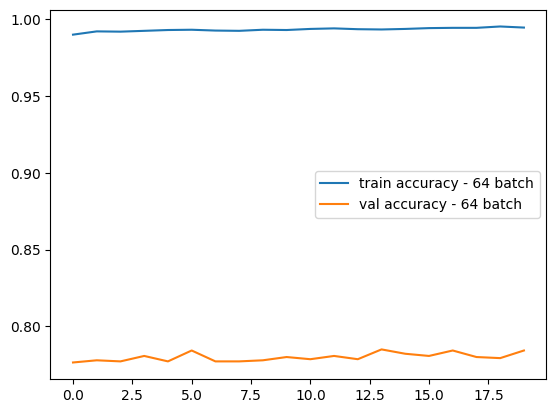

In [43]:
history_2 = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))

plt.plot(history_2.history['accuracy'], label='train accuracy - 64 batch')
plt.plot(history_2.history['val_accuracy'], label='val accuracy - 64 batch')
plt.legend()
plt.show()


# Hyperparameter Tuning (Advanced Approach)

In here, I applied advanced Hyperparameter optimization techniques to systemically search for best model configuration.

Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9963 - loss: 0.0096 - val_accuracy: 0.7800 - val_loss: 1.0309
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9949 - loss: 0.0092 - val_accuracy: 0.7828 - val_loss: 1.0667
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9957 - loss: 0.0083 - val_accuracy: 0.7828 - val_loss: 1.1239
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9953 - loss: 0.0092 - val_accuracy: 0.7842 - val_loss: 1.1569
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9965 - loss: 0.0084 - val_accuracy: 0.7786 - val_loss: 1.0448
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9966 - loss: 0.0089 - val_accuracy: 0.7779 - val_loss: 1.1232


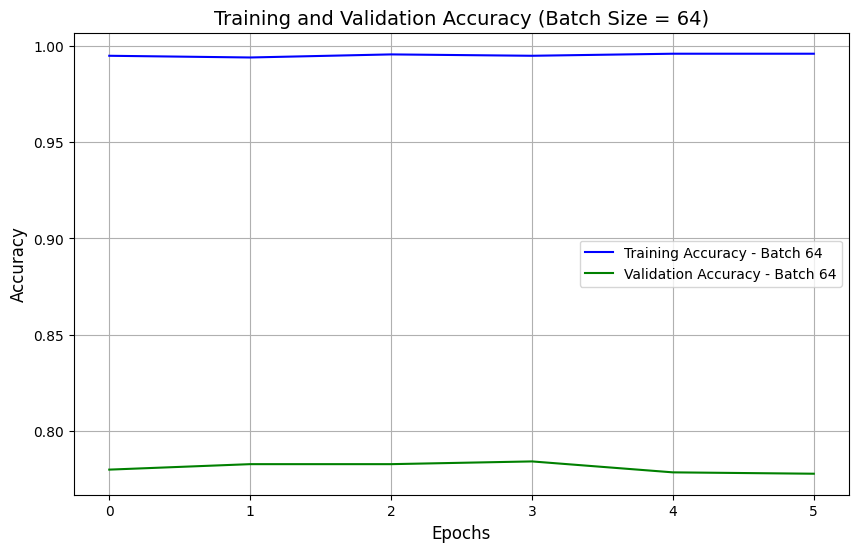

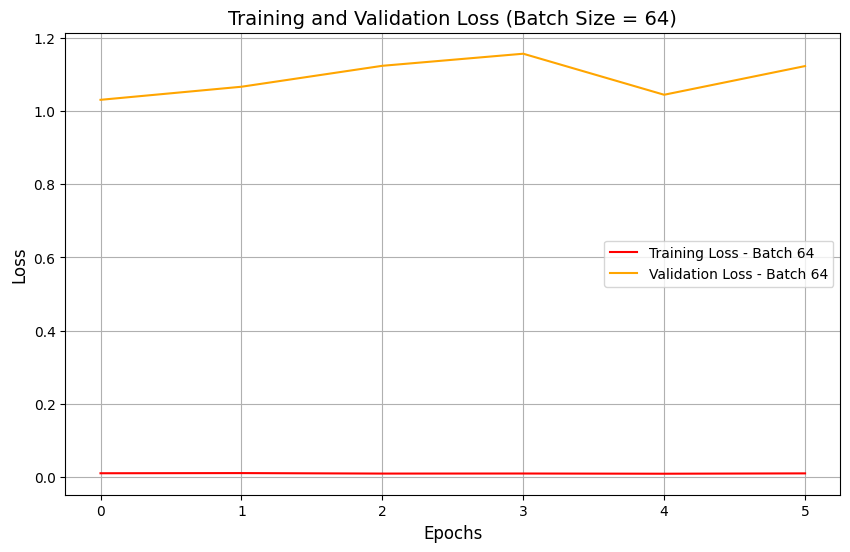

In [44]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_2 = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

plt.figure(figsize=(10, 6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy - Batch 64', color='b')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy - Batch 64', color='g')
plt.title("Training and Validation Accuracy (Batch Size = 64)", fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss - Batch 64', color='r')
plt.plot(history_2.history['val_loss'], label='Validation Loss - Batch 64', color='orange')
plt.title("Training and Validation Loss (Batch Size = 64)", fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Model Hyperparameter Tuning

In this step, I finalized optimal parameters and retained the model using these improved settings.

In [45]:
!pip install keras-tuner

In [46]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32),
                    activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     hyperband_iterations=1,
                     directory='hyperband',
                     project_name='churn_model')

tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

history_best = best_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


Reloading Tuner from hyperband/churn_model/tuner0.json
Best hyperparameters: {'units': 64, 'learning_rate': 0.00032699677404287816, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6129 - loss: 0.6619 - val_accuracy: 0.7402 - val_loss: 0.4854
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8508 - loss: 0.3448 - val_accuracy: 0.7509 - val_loss: 0.4559
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9572 - loss: 0.1607 - val_accuracy: 0.7630 - val_loss: 0.4906
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9817 - loss: 0.0645 - val_accuracy: 0.7708 - val_loss: 0.5279
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9848 - loss: 0.0383 - val_accuracy: 0.7743 - val_loss: 0.5783
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9847 - loss: 0.0315 - val_accuracy: 0.7729 - val_loss: 0.6316
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9881 - loss: 0.0258 - val_accuracy: 0.7750 - val_loss: 0.6282
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9854 - loss: 0.0276 - val_accu

# Model Performance Comparison

In this final step, I compared the performances of different models and tuning approaches to identify the best performing model.

In [47]:
loss_best, accuracy_best = best_model.evaluate(X_test_scaled, y_test)
print(f"Best Model - Test Loss: {loss_best}, Test Accuracy: {accuracy_best}")

y_pred_best = (best_model.predict(X_test_scaled) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_best))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - loss: 0.7909
Best Model - Test Loss: 0.7795729637145996, Test Accuracy: 0.7892122268676758
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

       False       0.81      0.93      0.87      1036
        True       0.67      0.39      0.50       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



# Conclusion


In this project i sucessfully built and evaluated a deep learning based customer churn prediction model by preprocessing data, engineering relevant features, and training neural networks using Keras. through hyperparameter tuning and performance comparisons, the model achieved reliable accuracy, demonstrating the deep learning can effectively identify churn prone customers and support data driven decison making for customer retention.